In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_testing import *

In [2]:
N = 8
K = 10
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [3]:
def potential_term(x):
    return 0*x
def source_zero(t):
    return 0*t

In [4]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [5]:
def u_ana(x,t):
    #return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-t-x0)**2/(2*sigma**2))
    return 1/2*(np.sin(2*np.pi*(x-t))+ np.sin(2*np.pi*(x+t)))
def v_ana(x,t):
    return 2*np.pi*np.cos(2*np.pi*(x+t))
x_ana = np.linspace(0,1,101)
#x_ana = np.linspace(0,1,101)
#theta_left = np.heaviside(0.6-x_ana,1)
#theta_right = np.heaviside(x_ana-0.6,1)

In [6]:
u = u_ana(x,0)
v = v_ana(x,0)

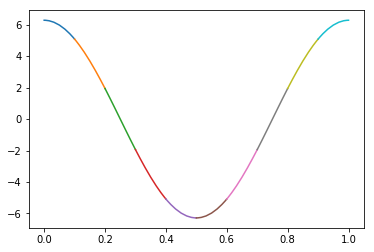

In [7]:
for i in range(len(u)):
    plt.plot(x[i],v[i])

In [8]:
u = u_ana(x,0)
v = v_ana(x,0)
t = 0.
V = potential_term(x)
t_target = 0.8
dt = CF*dx_min
nt = int((t_target-t)/dt)
print (nt)

20430


In [9]:
direc = "radiative_1side"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []

Directoryradiative_1sidealready exists


In [10]:
u_last= []
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u = RK4_Step(dt,DG_du_dt_radiative,un, K,N,t,a1,alpha,M_inv, M_inv_S,source_zero,vn,V)
    v = RK4_Step(dt,DG_du_dt_radiative,vn, K,N,t,a2,alpha,M_inv, M_inv_S,source_zero,None,V, un)
    t += dt 
    u_last.append(u[-1][-1])
    """if n%500 ==0:
        plt.figure(figsize=(11, 7), dpi=100)
        for i in range(len(u)):
            plt.plot(x[i],u[i],marker ='o')
        plt.ylabel('u')
        plt.ylim(-5,5)
        plt.title('t = '+str(np.round(t,3)))
        plt.legend()
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)"""

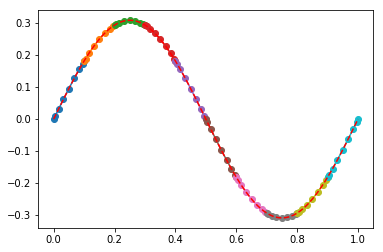

In [11]:
for i in range(len(u)):
    plt.plot(x[i],u[i],marker ='o')
plt.plot(x_ana, u_ana(x_ana,t),linestyle ='--',color ='red')

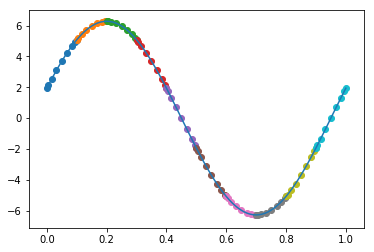

In [12]:
for i in range(len(v)):
    plt.scatter(x[i], v[i], marker = 'o')
plt.plot(x_ana, v_ana(x_ana,t))

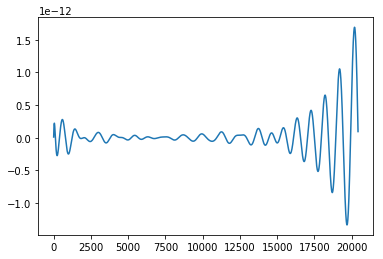

In [13]:
plt.plot(u_last)